<a href="https://colab.research.google.com/github/lafa-code/MachineLearning/blob/main/EkstraksiFitur_withNormalization_withPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/Internal-2024/Employee.csv'
df = pd.read_csv(file_path)

df.head()



,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
categorical_columns = ['Education', 'City', 'Gender', 'EverBenched']
numeric_columns = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'LeaveOrNot']

df[categorical_columns] = df[categorical_columns].astype('category')

#encoding
for col in categorical_columns:
    df[col] = df[col].cat.codes

In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [5]:
features = df.iloc[:, :-1]  # Select all columns except the last one

labels = df.iloc[:, -1]  # Select the last column

In [6]:
""" Z-Score Normalization """

from sklearn.preprocessing import StandardScaler

# buat pbjek dr kelas
scaler = StandardScaler()

# apply untuk kolom
features_z = scaler.fit_transform(features)

pd.DataFrame(features_z).to_csv('/content/drive/MyDrive/Employee_z.csv', index = False)

In [7]:
#proses PCA misal dari sekian fitur mau digabungkan berapa menjadi fitur baru
from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # berapa yang kamu ingin

# Sesuaikan PCA pada fitur standar
principal_components = pca.fit_transform(features_z)

# Buat DataFrame untuk menyimpan komponen utama
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

principal_df.head()

,PC1,PC2,PC3
0,1.009928,-2.304184,0.377730
1,-2.615258,0.886301,-2.034881
2,-0.006759,-1.316183,-1.673185
3,0.570258,0.837469,1.753412
4,-0.783810,0.059531,2.568601


In [8]:
#split
from sklearn.model_selection import train_test_split

# Split the data training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_df, labels, test_size=0.2, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create an ID3 Decision Tree Classifier
id3_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model on the training data
id3_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = id3_classifier.predict(X_test)

# Evaluate the model's accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78



Confusion Matrix:
[[528  82]
 [122 199]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       610
           1       0.71      0.62      0.66       321

    accuracy                           0.78       931
   macro avg       0.76      0.74      0.75       931
weighted avg       0.78      0.78      0.78       931



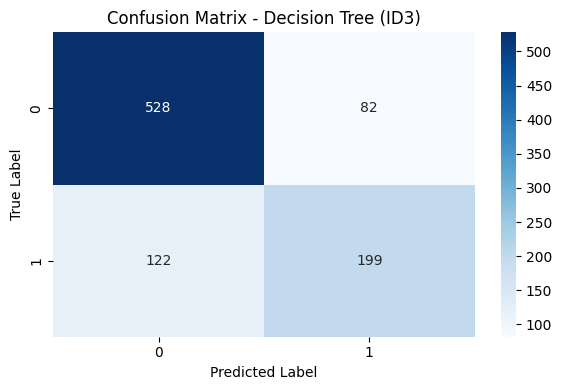

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=id3_classifier.classes_,
            yticklabels=id3_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree (ID3)')
plt.tight_layout()
plt.show()